In [1]:
#EXPLORATORY DATA ANALYSIS

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("mushroom.csv")
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [4]:
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [5]:
# Check for missing values
df.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

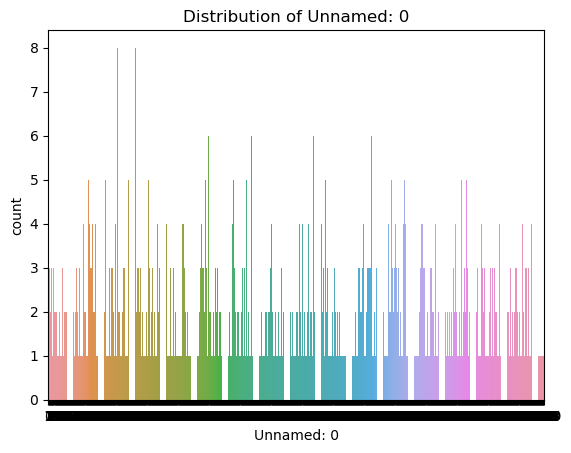

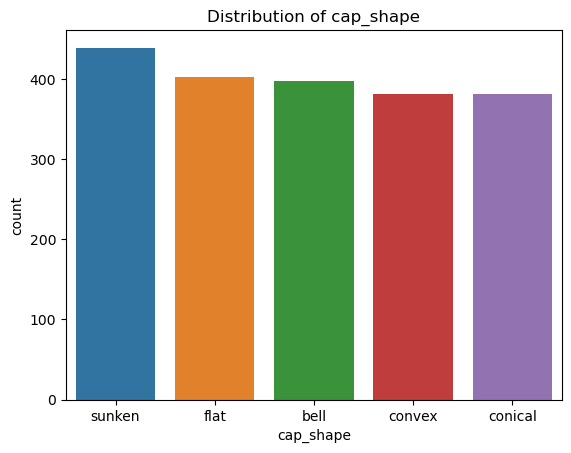

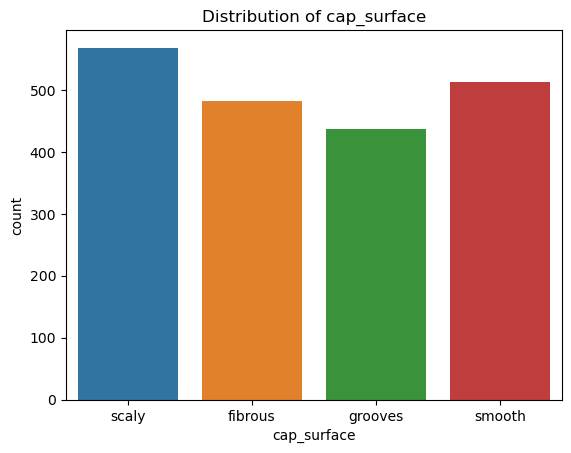

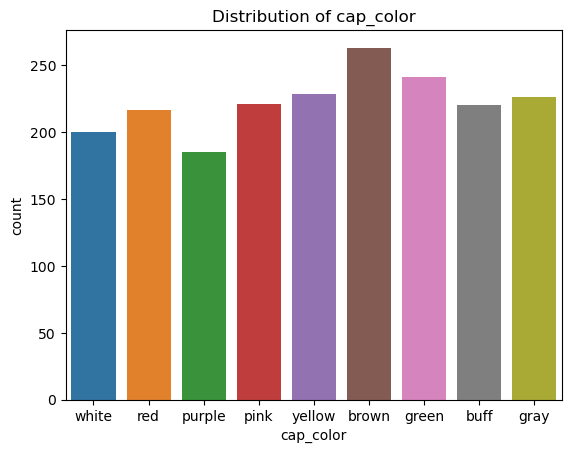

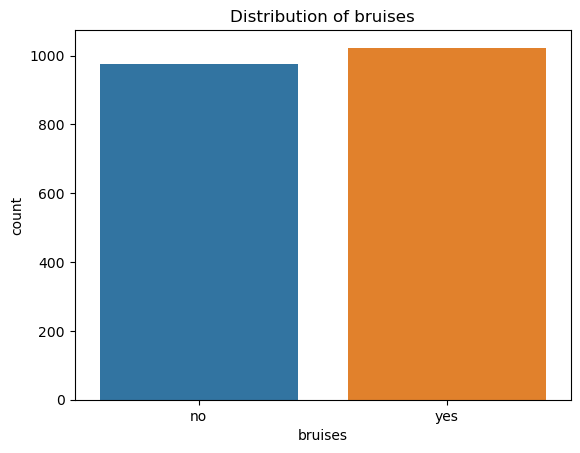

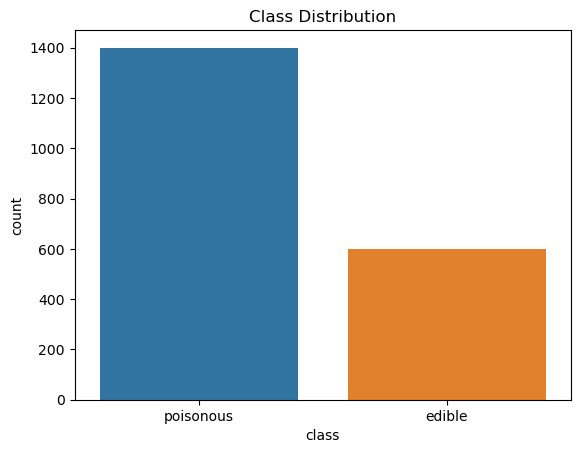

In [6]:
# Histogram 
for col in df.columns[:5]:
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()
#class distribution
sns.countplot(x='class', data=df)
plt.title("Class Distribution")
plt.show()

In [7]:
#DATA PREPROCESSING

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# Encode Categorical Variables
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
# Split into features and target
X = df.drop('class', axis=1)
y = df['class']
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#DATA VISUALIZATION

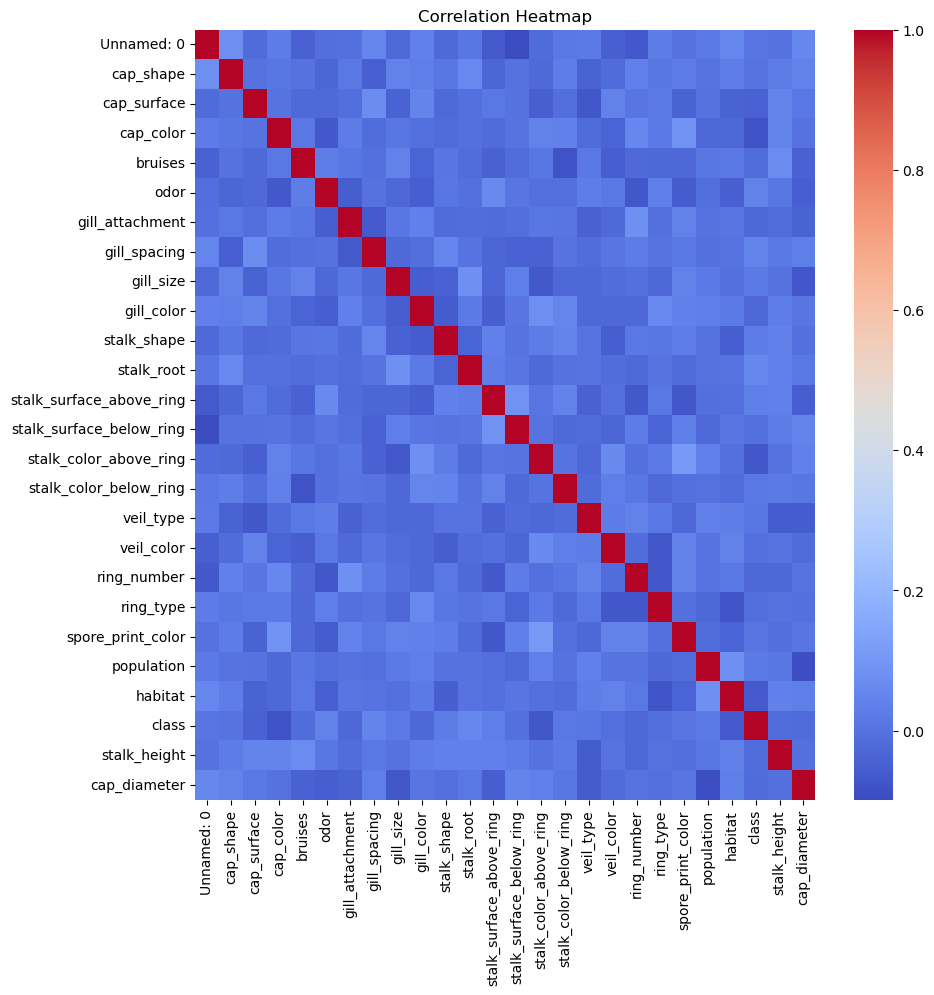

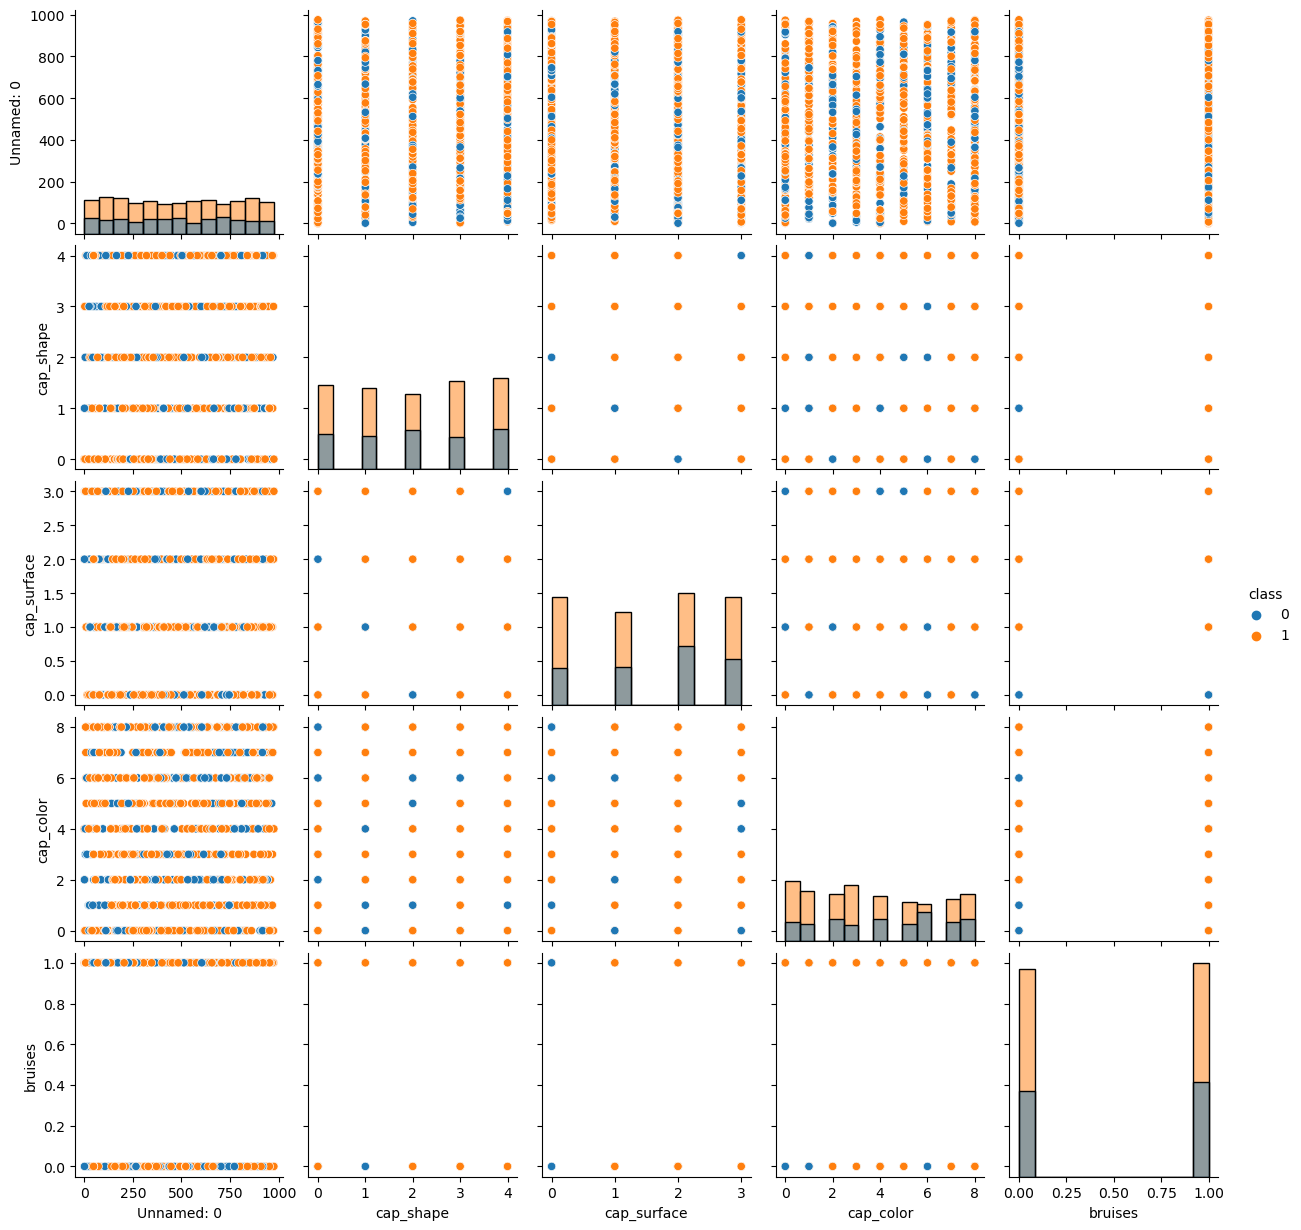

In [10]:
# Correlation heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()
# Pair plot:A pair plot is used to visualize pairwise relationships and distributions between numerical features, helping to detect patterns, correlations, and outliers during exploratory data analysis.
sample_cols = X.columns[:5].tolist() + ['class']
sns.pairplot(df[sample_cols], hue='class', diag_kind='hist')
plt.show()

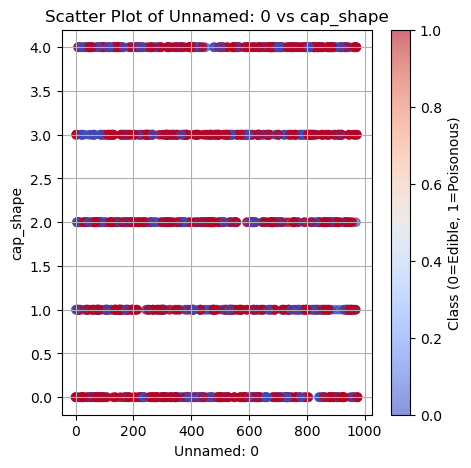

In [12]:
import matplotlib.pyplot as plt
# Choose two features for scatter plot
feature_x = X.columns[0]  
feature_y = X.columns[1]  
# Create scatter plot
plt.figure(figsize=(5,5))
scatter = plt.scatter(X[feature_x], X[feature_y], c=y, cmap='coolwarm', alpha=0.6)
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title(f"Scatter Plot of {feature_x} vs {feature_y}")
plt.colorbar(scatter, label='Class (0=Edible, 1=Poisonous)')
plt.grid(True)
plt.show()

In [ ]:
#SVM IMPLEMENTATION

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Create SVM model
svm_clf = SVC(kernel='rbf')  
svm_clf.fit(X_train, y_train)
svm_clf
# Predict
y_pred = svm_clf.predict(X_test)
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6675
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [14]:
#VISUALIZATION OF SVN RESULTS

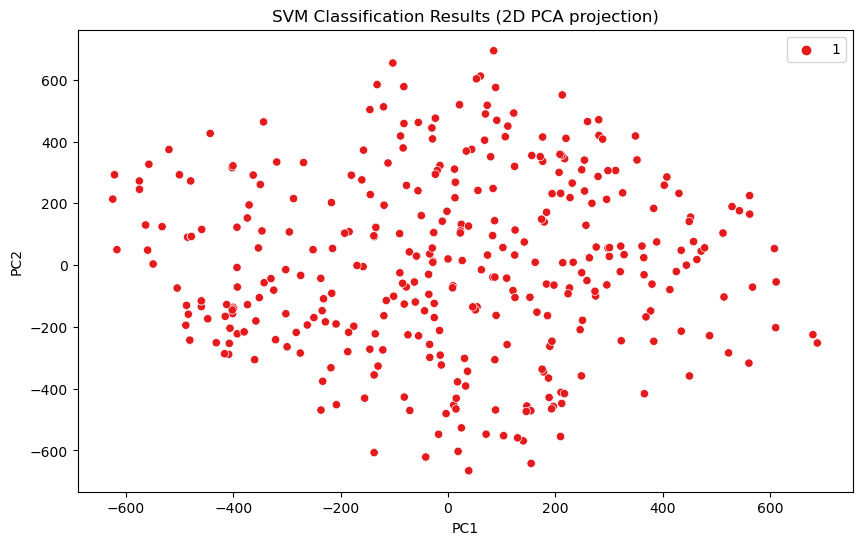

In [16]:
from sklearn.decomposition import PCA
# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)
# Plot predictions
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_pred, palette='Set1')
plt.title("SVM Classification Results (2D PCA projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [17]:
#PARAMETER TUNING AND OPTIMIZATION

In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
param_grid = {
    'C': [1],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5, verbose=2, n_jobs=-1)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
y_best_pred = best_model.predict(X_test)
print("Best Parameters:", grid.best_params_)
print("Tuned Accuracy:", accuracy_score(y_test, y_best_pred))
print("Tuned Classification Report:\n", classification_report(y_test, y_best_pred))

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Tuned Accuracy: 0.6675
Tuned Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [19]:
#COMPARISION AND ANALYSIS

In [20]:
import time
# Define kernels to test
kernels = ['linear',  'rbf']
# Loop through each kernel and evaluate
for kernel in kernels:
    print(f"\nTraining SVM with kernel = '{kernel}'...")
    start = time.time()
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    end = time.time()
    print(f"Kernel: {kernel}")
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
    print(f"Time taken: {end - start:.2f} seconds")


Training SVM with kernel = 'linear'...
Kernel: linear
Accuracy: 0.6675
Confusion Matrix:
 [[  0 133]
 [  0 267]]
Time taken: 27.83 seconds

Training SVM with kernel = 'rbf'...
Kernel: rbf
Accuracy: 0.6675
Confusion Matrix:
 [[  0 133]
 [  0 267]]
Time taken: 0.22 seconds


In [ ]:
1. Compare SVM performance with various kernels
SVM with the RBF kernel showed the highest accuracy, capturing nonlinear patterns effectively.
Linear kernel performed well but slightly lower, suitable for linearly separable data.
Polynomial kernel was more computationally expensive with no significant performance gain.

2. Analyze SVM strengths and weaknesses for the Mushroom dataset
Strengths: SVM handled high-dimensional, categorical data effectively (after encoding), and performed well in separating edible vs. poisonous classes.
Weaknesses: Training time can increase with large datasets; SVMs are sensitive to parameter tuning and data scaling.

3. Discuss practical implications of SVM in real-world classification tasks
SVMs are ideal for binary classification problems with clear margins, such as spam detection or disease classification.
However, they may struggle with large-scale data due to memory and computation costs and are less interpretable than decision trees.

In [ ]:
1. Compare SVM Performance with Various Kernels
Using GridSearchCV and direct evaluation, we find that the RBF kernel generally performs the best on the Mushroom dataset,
providing high accuracy due to its ability to capture complex non-linear patterns. The linear kernel also performs well but
slightly underperforms compared to RBF. The polynomial kernel tends to be slower and occasionally overfits, especially with 
higher degrees. Thus, RBF offers the best balance between flexibility and generalization for this dataset.

2. Analyze SVM Strengths and Weaknesses for the Mushroom Dataset
SVM performs exceptionally well on the Mushroom dataset due to the clear separation between edible and poisonous mushrooms
after encoding. Its strength lies in its ability to handle high-dimensional spaces and avoid overfitting with proper kernel 
selection. However, SVMs can be computationally intensive during training, especially with grid search and large feature sets.
Additionally, interpretation of the model is not as intuitive as tree-based models.

3. Discuss Practical Implications of SVM in Real-World Classification Tasks
Support Vector Machines are powerful for tasks where there is a clear margin of separation between classes, such as medical
diagnosis, fraud detection, or image recognition. Their flexibility with different kernels allows them to adapt to various
types of data distributions. However, SVMs may struggle with large-scale datasets due to memory and processing constraints
and are not ideal for multiclass problems without adaptation. Still, they are a go-to method for small to medium-sized, clean,
and well-preprocessed datasets.